## 2. Heaps定律
采用 Heaps 定律 (Heaps’ Law) 来估计词项数目 M。该定律将词项数目估计为一个与文档集 (Collection) 大小相关的函数：
$$ M = kT^b $$
其中，典型取值$30 \leq k \leq 100$，$b \approx 0.5$。

Heaps 定律的核心思想在于，它认为文档集 (Collection) 大小和词汇量 (Vocabulary) 之间最简单的关系就是它们在对数空间 (log-log Space) 中存在线性关系。再简单一点说，在对数空间中，词汇量 M 和文档集尺寸 (词条数量) T 组成一条直线，斜率 (slope) 约为 1/2。

In [1]:
with open("/path/of/your/corpus.txt", 'r', encoding='utf-8') as f:
    collection = f.readlines()

In [11]:
import jieba
import math

vocab_set = set()
M_list = []
for doc in collection:
    vocab_set.update(set(jieba.lcut(doc)))
    M_list.append(math.log10(len(vocab_set)))
T_list = [math.log10(t) for t in range(1,len(M_list)+1)]

(5000,) (5000,)
[2.31226906 0.42395235]
[3.00000000e+01 3.53897611e-16]


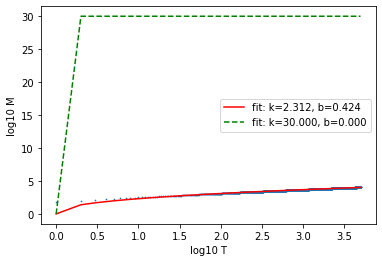

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def func(x, k, b):
    return k*(x**b)

ydata = np.array(M_list)
xdata = np.array(T_list)
plt.scatter(xdata, ydata, s=0.5)

print(xdata.shape,ydata.shape)
popt, pcov = curve_fit(func, xdata, ydata)
print(popt)

plt.plot(xdata, func(xdata, *popt), 'r-', label='fit: k=%5.3f, b=%5.3f' % tuple(popt))

#Constrain the optimization to the region of 30 <= k <= 100, 0 <= b <= 1:
popt, pcov = curve_fit(func, xdata, ydata, bounds=([30, 0.], [100, 1.]))
print(popt)
plt.plot(xdata, func(xdata, *popt), 'g--', label='fit: k=%5.3f, b=%5.3f' % tuple(popt))

plt.xlabel('log10 T')
plt.ylabel('log10 M')
plt.legend()
plt.show()